In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
left_df = pd.read_csv('./data/lefty_data.csv')

In [3]:
left_df['birth_year'] = 1986 - left_df['Age']
left_df.head()

,Age,Male,Female,birth_year
0,10,12.717558,12.198041,1976
1,11,15.318830,11.144804,1975
2,12,14.808281,11.549240,1974
3,13,13.793744,11.276442,1973
4,14,15.156304,11.572906,1972


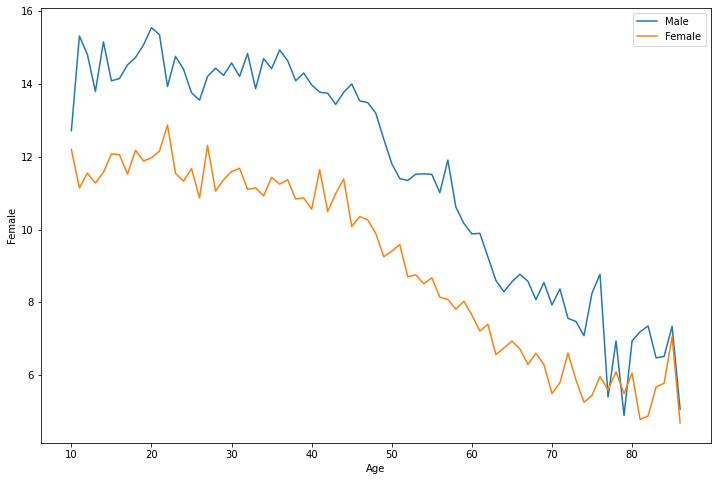

In [4]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Age', y='Male', data=left_df, label='Male')
sns.lineplot(x='Age', y='Female', data=left_df, label='Female')
plt.legend()

In [5]:
left_df['mf_mean'] = left_df[['Male','Female']].mean(axis=1)
left_df.head()

,Age,Male,Female,birth_year,mf_mean
0,10,12.717558,12.198041,1976,12.457800
1,11,15.318830,11.144804,1975,13.231817
2,12,14.808281,11.549240,1974,13.178760
3,13,13.793744,11.276442,1973,12.535093
4,14,15.156304,11.572906,1972,13.364605


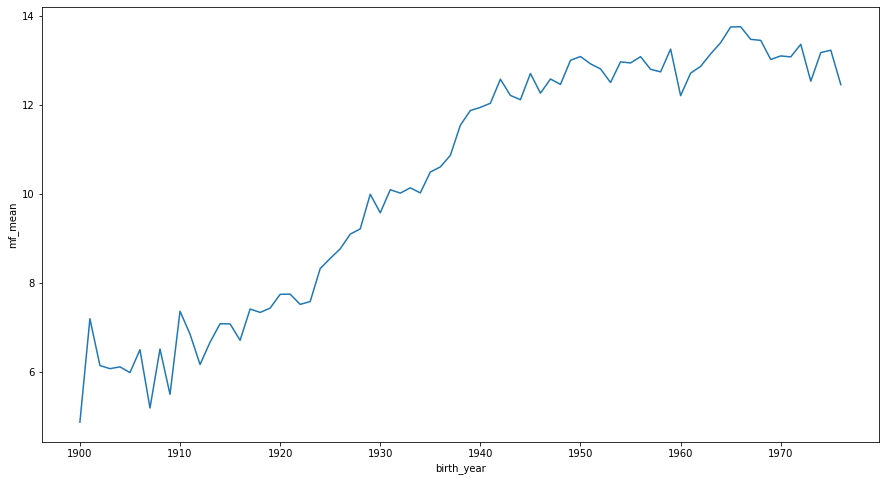

In [6]:
plt.figure(figsize=(15,8))
sns.lineplot(x='birth_year', y='mf_mean', data=left_df)

In [7]:

def lefties_prob_on_given_age(ages_of_death,study_year = 1990):
    # As we can see in Above graph over a time there is variation in data of left-handed people
    # in Early 1900 there is less lefties and over a time it increases So we take mean in 3 section
    # Early 1900 rate, Mid rate & late 1900 rate.
    
    # Use the mean of the 10 last and 10 first points for left-handedness rates before and after the start 
    early_rate = left_df['mf_mean'][-10:].mean() 
    late_rate = left_df['mf_mean'][:10].mean()
    middle_rates = left_df.loc[left_df['birth_year'].isin(study_year - ages_of_death)]['mf_mean']
    youngest_age = study_year - 1986 + 10 # the youngest age is 10
    oldest_age = study_year - 1986 + 86 # the oldest age is 86
    
    prob = np.zeros(ages_of_death.shape) # create an empty array to store the results
    # extract rate of left-handedness for people of ages 'ages_of_death'
    prob[ages_of_death > oldest_age] = early_rate / 100
    prob[ages_of_death < youngest_age] = late_rate / 100
    prob[np.logical_and((ages_of_death <= oldest_age), (ages_of_death >= youngest_age))] = middle_rates / 100
    
    return prob

In [8]:
death_data = pd.read_csv('./data/cdc_vs00199_table310.tsv', sep='\t', skiprows=[1])
death_data.head()

,Age,Both Sexes,Male,Female
0,0,27937.0,15646.0,12291.0
1,1,1989.0,1103.0,886.0
2,2,1376.0,797.0,579.0
3,3,1046.0,601.0,445.0
4,4,838.0,474.0,364.0


In [9]:
# drop NaN values from the `Both Sexes` column
death_data.dropna(subset=['Both Sexes'], inplace=True)

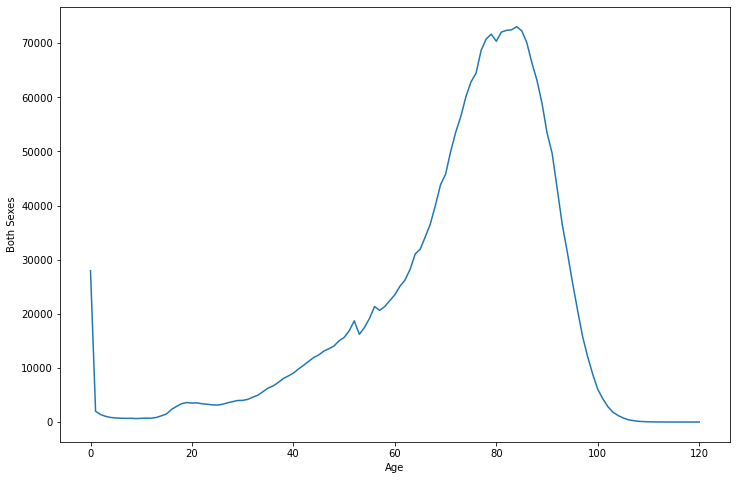

In [10]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Age', y='Both Sexes', data=death_data)

In [11]:

def prob_lefties(death_data,study_year = 1990): # sum over P_lh for each age group
    
    p_list = death_data['Both Sexes'] * lefties_prob_on_given_age(death_data['Age'], study_year) 
    p = p_list.sum()
    return p / np.sum(death_data['Both Sexes']) # normalize to total number of people (sum of death_distribution_data['Both Sexes'])

print(prob_lefties(death_data))

0.07766387615350638


In [12]:
def prob_Age_given_lefties(age_of_death, death_data, study_year = 1990):
    """ The overall probability of being a particular `age_of_death` given that you're left-handed """
    prob_age = death_data['Both Sexes'][age_of_death] / np.sum(death_data['Both Sexes'])
    prob_lefty = prob_lefties(death_data, study_year) 
    prob_lefties_given_age = lefties_prob_on_given_age(age_of_death,study_year) 
    return prob_lefties_given_age*prob_age/prob_lefty

In [13]:
def prob_Age_given_righties(age_of_death, death_data, study_year = 1990):
    prob_age = death_data['Both Sexes'][age_of_death] / death_data['Both Sexes'].sum()
    prob_righty = 1 - prob_lefties(death_data,study_year)
    prob_righty_given_age = 1 - lefties_prob_on_given_age(age_of_death,study_year)
    return prob_righty_given_age*prob_age/prob_righty

In [14]:
ages = np.arange(0, 115, 1)
lefties_probability = prob_Age_given_lefties(ages, death_data)
righties_probability = prob_Age_given_righties(ages, death_data)

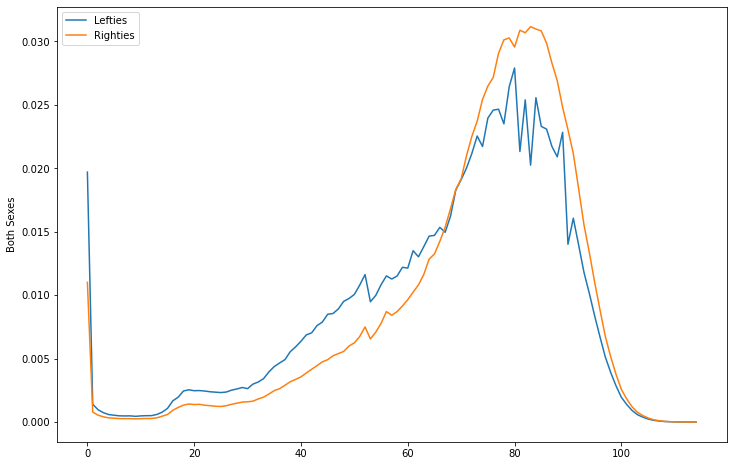

In [15]:
plt.figure(figsize=(12,8))
sns.lineplot(x=ages, y=lefties_probability, label='Lefties')
sns.lineplot(x=ages, y=righties_probability, label='Righties')
plt.legend(loc='upper left')

In [16]:
avg_lefties_age =  np.nansum(ages*np.array(lefties_probability))
avg_righties_age =  np.nansum(ages*np.array(righties_probability))

print("Average age of lefthanded : " + str(avg_lefties_age))
print("Average age of righthanded : " + str(avg_righties_age))

print("The difference in average ages is : " + str(round(avg_righties_age - avg_lefties_age, 1)) + " years.")

Average age of lefthanded : 67.25564319021846
Average age of righthanded : 72.79764877049006
The difference in average ages is : 5.5 years.


In [17]:
lefties_prob_2020 = prob_Age_given_lefties(ages, death_data, 2020)
righties_prob_2020 = prob_Age_given_righties(ages, death_data, 2020)

avg_lefties_age_2020 = np.nansum(ages*np.array(lefties_prob_2020))
avg_righties_age_2020 = np.nansum(ages*np.array(righties_prob_2020))

print("The difference in average ages is " + 
      str(round(avg_righties_age_2020 - avg_lefties_age_2020, 1)) + " years.")

The difference in average ages is 2.0 years.
